In [1]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class ThreeLayerNet:
    def __init__(self, input_size, first_size, second_size, output_size, weight_init_std = 0.01):
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, first_size)
        self.params['b1'] = np.zeros(first_size)
        self.params['W2'] = weight_init_std * np.random.randn(first_size, second_size)
        self.params['b2'] = np.zeros(second_size)
        self.params['W3'] = weight_init_std * np.random.randn(second_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
    
    # x = 입력 데이터, t = 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
   
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db

        return grads

0.01 %
6.01 %
12.01 %
18.01 %
24.01 %
30.01 %
36.01 %
42.01 %
48.01 %
54.01 %
60.01 %
66.01 %
72.01 %
78.01 %
84.01 %
90.01 %
96.01 %
train_acc = 0.9926
test_acc = 0.9773


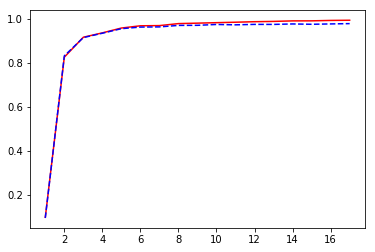

In [3]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

network = ThreeLayerNet(784, 200, 50, 10)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(round((i+1)/iters_num * 100, 2),'%')

epoch = [i for i in range(1, len(train_acc_list)+1)]
plt.plot(epoch, train_acc_list, 'r-')
plt.plot(epoch, test_acc_list, 'b--')
print('train_acc =', train_acc)
print('test_acc =', test_acc)
plt.show()

In [4]:
import matplotlib.image as mpimg

test = []
ans = np.diag([1]*10)
for i in range(10):
    img = mpimg.imread('{}.jpg'.format(i))[:,:,0]/255
    img = img.reshape(784,)
    test.append(img)
    
test = np.array(test)
network.accuracy(test,ans)

1.0

In [5]:
import matplotlib.image as mpimg

for i in range(10):
    img = mpimg.imread('{}.jpg'.format(i))[:,:,0]/255
    img = img.reshape(1,784)

    v = network.predict(img)
    print(v)
    print('정답 =',[i],',', '예측 =',np.where(v[0]==max(max(v))), '차이 =', abs(v[0][i]-max(max(v))))
    print(' ')

[[ 5.95634944 -6.04037212  2.43787134 -4.77262904 -1.18648138 -1.10896542
   1.89499856  1.97080794 -0.74500642  1.51707757]]
정답 = [0] , 예측 = (array([0], dtype=int64),) 차이 = 0.0
 
[[-8.78497178  9.39535347  1.64824521  3.38876448 -2.77536777 -2.92114599
  -4.88113712  3.12596191  2.78522604 -1.21683226]]
정답 = [1] , 예측 = (array([1], dtype=int64),) 차이 = 0.0
 
[[-0.10021105  0.98290055  6.69737919  2.72664186 -9.09065253 -2.43301683
  -3.83369379  1.8606105   4.22758512 -1.36497009]]
정답 = [2] , 예측 = (array([2], dtype=int64),) 차이 = 0.0
 
[[-10.00955011   6.03009908   4.00764244  14.97536756  -9.52354443
    2.08473088 -11.1178845   -0.84155693   2.77081953   1.18283016]]
정답 = [3] , 예측 = (array([3], dtype=int64),) 차이 = 0.0
 
[[-4.70984805 -1.38133064 -2.17254145 -4.00438166  8.94985588 -0.44876321
  -0.07457615  1.33926599 -0.75283352  3.09779617]]
정답 = [4] , 예측 = (array([4], dtype=int64),) 차이 = 0.0
 
[[-4.53603935 -2.33627297 -5.19177478  4.6627788  -1.6424511   8.88395479
  -5.57542569 -0

In [6]:
import matplotlib.image as mpimg

test = []
ans = np.diag([1]*10)
for i in range(10):
    img = mpimg.imread('S{}.jpg'.format(i))[:,:,0]/255
    img = img.reshape(784,)
    test.append(img)
    
test = np.array(test)
network.accuracy(test,ans)

0.6

In [10]:
import matplotlib.image as mpimg

for i in range(10):
    img = mpimg.imread('S{}.jpg'.format(i))[:,:,0]/255
    img = img.reshape(1,784)

    v = network.predict(img)
    print(v)
    print('정답 =',[i],',', '예측 =',np.where(v[0]==max(max(v)))[0], '차이 =', abs(v[0][i]-max(max(v))))
    print(' ')

[[  1.99703876 -14.10692723  -1.0870661   -2.7740662    3.5236147
    0.36552523  -9.25220827   5.8896283    2.49600626  12.63889729]]
정답 = [0] , 예측 = [9] 차이 = 10.641858531498963
 
[[-7.80875965  6.0017002  -3.03339923 -5.96854567  5.56833867  0.78312303
   3.91883347 -0.57952695  5.07492172 -4.2295223 ]]
정답 = [1] , 예측 = [1] 차이 = 0.0
 
[[ -3.57300224   2.89571553  13.41890913   3.8552545   -5.20052703
  -10.8885672   -8.35310208   9.467274     1.76273968  -3.84306744]]
정답 = [2] , 예측 = [2] 차이 = 0.0
 
[[-11.32023131   4.68716446   8.4009687   28.73053505 -28.40743016
    7.51715997 -22.56783463  -1.84518877   8.00547177   5.93784323]]
정답 = [3] , 예측 = [3] 차이 = 0.0
 
[[-11.76882151  -6.09058082  -9.89137919  -4.33172603  21.26193328
   -1.42820116  -7.92003683   2.53865862   2.31744954  15.03521255]]
정답 = [4] , 예측 = [4] 차이 = 0.0
 
[[-9.66258544  0.87984843 -5.31676232  9.61170814 -3.38849616  8.56284484
  -8.69955874 -4.03294888  3.26301688  8.46055411]]
정답 = [5] , 예측 = [3] 차이 = 1.04886329